In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [57]:
mall=pd.read_csv("Desktop/eda/Mall_Customers.csv")

In [58]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
mall.shape

(200, 5)

In [60]:
mall.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [61]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [62]:
mall=mall.drop(['CustomerID','Gender'],axis=1)

In [63]:
mall.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [64]:
scaler=StandardScaler()

In [65]:
X_new=scaler.fit_transform(mall)

In [66]:
X_new

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [67]:
scmall=pd.DataFrame(X_new,columns=list(mall))
scmall.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [68]:
from sklearn.cluster import KMeans

In [69]:

inertia=[] # create list of inertia or variance 
cluster=range(1,10) # fitting diffrent cluster
for i in cluster:
    kmeans=KMeans(n_clusters=i)# fitting the model 
    kmeans.fit(scmall)
    inertia.append(kmeans.inertia_)

C:\Users\278\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'no of cluster')

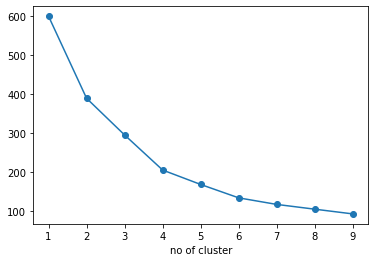

In [70]:

plt.plot(cluster,inertia,'o-') # plotting cluster on x axis
plt.xlabel('no of cluster')

In [71]:

kmeans=KMeans(n_clusters=5)# fitting the model 
kmeans.fit(scmall)

KMeans(n_clusters=5)

In [72]:
pd.DataFrame(kmeans.cluster_centers_,columns=list(mall))

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.980679,-0.743060,0.467440
1,1.204841,-0.235773,-0.052368
2,-0.428806,0.974847,1.216085
3,0.073331,0.974945,-1.197297
4,0.531074,-1.290508,-1.236467


In [73]:
clusters=kmeans.predict(scmall)# it tells which column belong to that 
clusters 

array([0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 0, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [74]:
name_cluster=kmeans.labels_ # labels of cluster you can change the name of cluster 
name_cluster

array([0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 0, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

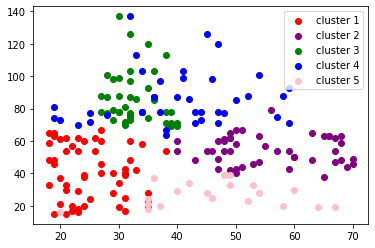

In [75]:
plt.scatter(mall.iloc[clusters==0,0],mall.iloc[clusters==0,1],color='red',label='cluster 1')
plt.scatter(mall.iloc[clusters==1,0],mall.iloc[clusters==1,1],color='purple',label='cluster 2')
plt.scatter(mall.iloc[clusters==2,0],mall.iloc[clusters==2,1],color='green',label='cluster 3')
plt.scatter(mall.iloc[clusters==3,0],mall.iloc[clusters==3,1],color='blue',label='cluster 4')
plt.scatter(mall.iloc[clusters==4,0],mall.iloc[clusters==4,1],color='pink',label='cluster 5')
plt.legend()
plt.show()

In [76]:
mall[(mall['Annual Income (k$)']<40) & (mall['Spending Score (1-100)']>60)]['Age'].mean()

25.52173913043478

In [77]:
mall[(mall['Annual Income (k$)']>70) & (mall['Spending Score (1-100)']<40)]['Age'].mean()

41.22222222222222